from google.colab import drive

# Mount Google Drive (authentication required)
drive.mount('/content/gdrive')


In [1]:
from google.colab import drive

# Mount Google Drive (authentication required)
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [1]:
import pandas as pd

df = pd.read_csv('ds.csv', usecols=['ID', 'Disease_Risk']).head(12)
df

,ID,Disease_Risk
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,0


In [ ]:
from google.colab import drive

# Mount Google Drive (authentication required)
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import cv2
import numpy as np

# Example: Load one image
image_path ='F:/cvd/static/Images/4.png' 

image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = image / 255.0  # Normalize pixel values


In [6]:
image_paths = ['F:/cvd/static/Images/0.png',
               'F:/cvd/static/Images/1.png',
               'F:/cvd/static/Images/2.png',
               'F:/cvd/static/Images/3.png',
               'F:/cvd/static/Images/4.png',
               'F:/cvd/static/Images/5.png',
               'F:/cvd/static/Images/6.png',
               'F:/cvd/static/Images/7.png',
               'F:/cvd/static/Images/8.png',
               'F:/cvd/static/Images/9.png',
               'F:/cvd/static/Images/10.png',
               'F:/cvd/static/Images/11.png',
               'F:/cvd/static/Images/12.png']



In [7]:

labels = [df['Disease_Risk'].head(12)]  # Example labels (1 for disease risk, 0 for no risk)

# Load and preprocess all images
images = []
for path in image_paths:
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    images.append(img)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [8]:
images

array([[[[0.00784314, 0.        , 0.00392157],
         [0.01176471, 0.00392157, 0.00784314],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.01176471, 0.00392157, 0.00784314],
         [0.00392157, 0.        , 0.        ],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.        , 0.00392157],
         ...,
         [0.00784314, 0.        , 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ]

In [9]:

labels

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]], dtype=int64)

In [10]:
labels=[1,1,1, 1, 1, 1, 1, 1, 1, 0, 1, 1,0]

In [11]:
print(len(images))  # Check the number of images
print(len(labels))  # Check the number of labels


13
13


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense (fully connected) layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout for regularization
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    return model


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming images and labels are already loaded and preprocessed
# Convert lists to NumPy arrays if needed
images = np.array(images)
labels = np.array(labels)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify the shapes of the training and validation sets
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# Define the input shape based on your images
input_shape = x_train[0].shape

# Create the CNN model
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model using the manually split training and validation sets
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Training data shape: (10, 224, 224, 3)
Validation data shape: (3, 224, 224, 3)
Training labels shape: (10,)
Validation labels shape: (3,)


c:\Users\santh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6943 - val_accuracy: 0.6667 - val_loss: 2.9789
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9000 - loss: 0.9391 - val_accuracy: 0.6667 - val_loss: 2.4873
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - accuracy: 0.9000 - loss: 0.6992 - val_accuracy: 0.6667 - val_loss: 1.4339
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 0.9000 - loss: 0.3343 - val_accuracy: 0.6667 - val_loss: 0.8310
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - accuracy: 0.9000 - loss: 0.2642 - val_accuracy: 0.6667 - val_loss: 0.6117
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.9000 - loss: 0.4447 - val_accuracy: 0.6667 - val_loss: 0.6683
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.9000 - loss: 0.3859 - val_accuracy: 0.6667 - val_loss: 0.8010
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - accuracy: 0.9000 - loss: 0.3314 - val_accuracy: 0.6667 - val_loss: 1.

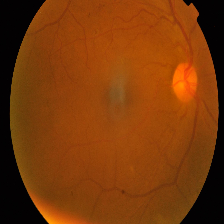

In [14]:
from PIL import Image

# Example: Load and preprocess a new image
new_image_path = 'F:/cvd/static/Images/10.png'
# Replace 'path/to/your/image.jpg' with the actual path to your image
img = Image.open(new_image_path)
img




In [15]:
# Example: Load and preprocess a new image for prediction

new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (224, 224))
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
new_image = new_image / 255.0  # Normalize pixel values

# Make predictions
prediction = model.predict(np.expand_dims(new_image, axis=0))
predicted_class = 1 if prediction > 0.5 else 0

# Interpret the prediction
if predicted_class == 0:
    print("No diabetic retinopathy detected.")
else:
    print("Diabetic retinopathy detected.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Diabetic retinopathy detected.


In [17]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained TensorFlow/Keras model
model.save('diabetic_retinopathy_model.h5')


In [19]:
pip install flask

  Obtaining dependency information for flask from https://files.pythonhosted.org/packages/61/80/ffe1da13ad9300f87c93af113edd0638c75138c42a0994becfacac078c06/flask-3.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for Jinja2>=3.1.2 from https://files.pythonhosted.org/packages/31/80/3a54838c3fb461f6fec263ebf3a3a41771bd05190238de3486aae8540c36/jinja2-3.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for itsdangerous>=2.1.2 from https://files.pythonhosted.org/packages/04/96/92447566d16df59b2a776c0fb82dbc4d9e07cd95062562af01e408583fc4/itsdangerous-2.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for click>=8.1.3 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for blinker>=1.6.2 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
